In [1]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt

import ipywidgets as widgets

from test_module import *

In [9]:
def theta_std(x):
    # return np.piecewise(x, [x <= 0, np.all([0 < x, x < 1], axis=0), 1 <= x], [1, lambda x: np.exp(1-1/(1-x**2)), 0])
    return np.piecewise(x, [x <= 0, np.all([0 < x, x < 1], axis=0), 1 <= x], [1, lambda x: -6*x**5 + 15*x**4 - 10*x**3 + 1, 0])

def theta_m(x0, delta, x):
    return 1 - theta_std((x-x0)/delta)
    # return theta_std((x0-x)/delta)

def theta_p(x0, delta, x):
    return theta_std((x-x0)/delta)

def theta(x1, x2, x3, x):
    return np.piecewise(x, [x <= x2, x2 < x], [lambda x: theta_m(x1, x2-x1, x), lambda x: theta_p(x2, x3-x2, x)])

def p(x0, k, b, x):
    if abs(k) < 1e-9 or b < 1e-9:
        return b
    else:
        return b + k*(x-x0) + (k**2)/(4*b)*(x-x0)**2

def E(x0, k, b, x):
    n = len(x0)
    result = np.zeros(len(x))
    total_theta = np.zeros(len(x))
    x0_aug = np.concatenate(([x0[0]-1/2], x0, [x0[n-1]+1/2]))
    for i in range(n):
        t = theta(x0_aug[i], x0_aug[i+1], x0_aug[i+2], x)
        total_theta += t
        result += t*p(x0[i], k[i], b[i], x)

    return result # / total_theta

def three_point_interpolation(x, k, b, y):
    x_aug = np.concatenate(([x[0]-1/2], x, [x[2]+1/2]))
    result = np.zeros(len(y))
    for i in range(3):
        t = theta(x_aug[i], x_aug[i+1], x_aug[i+2], y)
        result += t * p(x[i], k[i], b[i], y)

    return result

def E_T(x, k, b, y):
    n = len(x)
    result = np.zeros(len(y))
    # total_theta = 0
    x_aug = np.concatenate(([x[0]-1/2], x, [x[n-1]+1/2]))
    for i in range(n):
        t = theta(x_aug[i], x_aug[i+1], x_aug[i+2], y)
        # total_theta += t
        index_min = min(max(i-1, 0), n-3)
        index_max = index_min + 3
        result += t*three_point_interpolation(x[index_min:index_max], k[index_min:index_max], b[index_min:index_max], y)

    return result # / total_theta

@interact(x00=(0, 1, 1))
def plot(x00):
    x0 = np.sort(np.random.rand(5))
    b = np.sin(x0*9)**2
    k = 18*np.sin(x0*9)*np.cos(x0*9)

    x = np.linspace(-1, 2, 100)
    y_actual = np.sin(x*9)**2
    y = E(x0, k, b, x)
    y_T = E_T(x0, k, b, x)

    plt.plot(x, y_actual, "g-")
    plt.plot(x0, b, 'g.')
    plt.plot(x, y, "b-")
    plt.plot(x, y_T, "r-")
    plt.xlim(-1, 2)
    plt.ylim(0, 1)
    plt.show()

    plt.plot(x, y - y_actual, "m-")
    plt.plot(x, y_T-y_actual, "c-")
    plt.xlim(0, 1)
    plt.show()


interactive(children=(IntSlider(value=0, description='x00', max=1), Output()), _dom_classes=('widget-interact'…

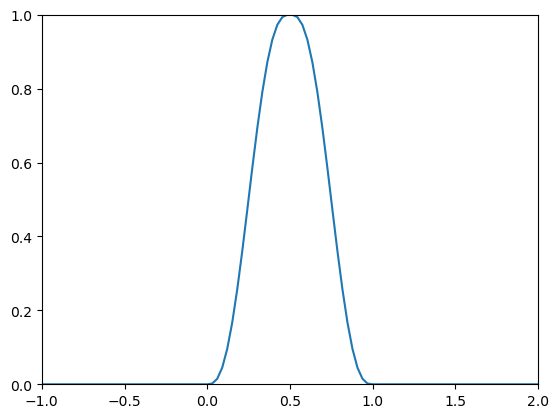

In [10]:
x1 = 0
x2 = 1/2
x3 = 1

# plot theta
x = np.linspace(-1, 2, 100)
plt.plot(x, theta(x1, x2, x3, x))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.show()

In [2]:
def sigma(x, x0, r):
    if np.any(np.abs(x-x0) >= 1) >= 1:
        return 0
    else:
        return np.prod(np.e * np.exp(-1/(1-np.abs(x-x0)/r)))

In [6]:
def fun(point):
    lam = 1.1
    normalization = 0
    if np.any(point == 1):
        return 0
    else:
        squares : list[wit.Hypercube] = root.cubes_dilation_contains_point(point, lam)
        val = np.zeros(len(squares))
        sig = np.zeros(len(squares))
        for i in range(0, len(squares)):
            square = squares[i]
            center = square.pos + square.width / 2
            sig[i] = sigma(*point, *center, square.width*lam/2)
            # sig[i] = 1
            val[i] = wit.evaluate_cube(square, point)
            # val[i] = 1
            # print(center, sig[i])
        if np.sum(sig) == 0:
            return 0
        sig = sig / np.sum(sig)
        return val @ sig
        if normalization <= 1e-6:
            return 0
        else:
            return val / normalization

In [2]:
def sigma(x, y, x0, y0, r):
    # distance_squared = ((x-x0)**2 + (y-y0)**2)/(r**2)
    if np.abs(x-x0) >= 1 or np.abs(y-y0) >= 1:
        return 0
    else:
        fx = np.e * np.exp(-1/(1-np.abs(x-x0)/r))
        fy = np.e * np.exp(-1/(1-np.abs(y-y0)/r))
        return fx * fy

# 1

In [3]:
def f(x, y):
    return 0.6*(x-0.6) + 0.3*(y-0.6) + 1

In [4]:
def g(x, y):
    return 1*(x-0.3) + 0*(y-0.3) + 1

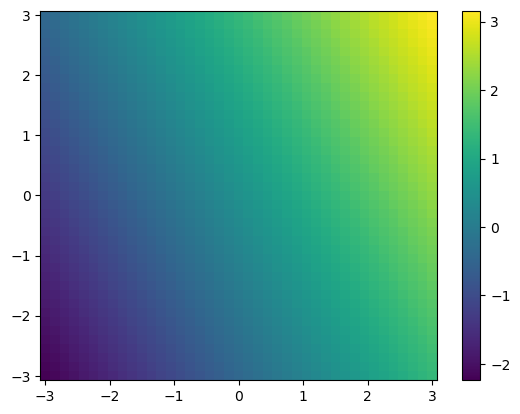

In [16]:
x_min = -3
x_max = 3
x_res = 41
x_step = (x_max - x_min) / (x_res - 1)

y_min = -3
y_max = 3
y_res = 41
y_step = (y_max - y_min) / (y_res - 1)

def x(i):
    return x_min + i*x_step

def y(j):
    return y_min + j*y_step

X = x(np.arange(x_res))
Y = y(np.arange(y_res))
Z = np.zeros((x_res, y_res), dtype=float)
for i in range(x_res):
    for j in range(y_res):
        Z[i, j] = f(x(i), y(j))
Z = Z.T

plt.pcolormesh(Y, X, Z)
plt.colorbar()
plt.show()

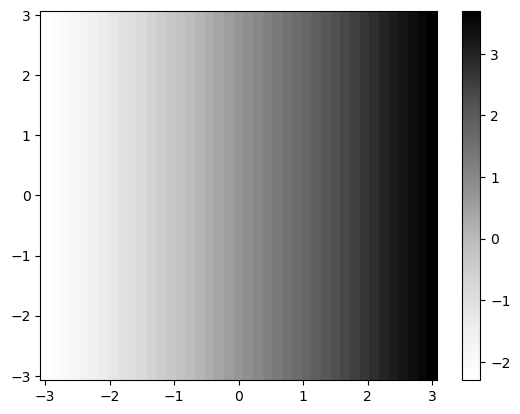

In [17]:
x_min = -3
x_max = 3
x_res = 41
x_step = (x_max - x_min) / (x_res - 1)

y_min = -3
y_max = 3
y_res = 41
y_step = (y_max - y_min) / (y_res - 1)

def x(i):
    return x_min + i*x_step

def y(j):
    return y_min + j*y_step

X = x(np.arange(x_res))
Y = y(np.arange(y_res))
Z = np.zeros((x_res, y_res), dtype=float)
for i in range(x_res):
    for j in range(y_res):
        Z[i, j] = g(x(i), y(j))
Z = Z.T

plt.pcolormesh(Y, X, Z, cmap="Greys")
plt.colorbar()
plt.show()

In [5]:
def f(x, y):
    return x*np.sin(y*2*np.pi)

def F(x, y, a, b):
    return np.sin(b*2*np.pi)*(x-a) + 2*np.pi*a*np.cos(b*2*np.pi)*(y-b) + x*np.sin(y*2*np.pi)

In [6]:
def sample_points(count: int, type: str):
    """Types: random, clusters, worst"""

    if type == "random":
        return np.random.rand(count, 2)
    if type == "clusters":
        return np.concatenate(
            (
                np.random.rand(count//3,2) * 0.1 + 0.1,
                np.random.rand(count//3,2) * 0.1 + 0.9,
                np.random.rand(count//3 + count % 3,2) * 0.1 + np.array([0.1, 0.9])
            ), axis=0
        )
    if type == "worst":
        array = 2.0 ** np.arange(-1, -count-1, -1)
        return np.vstack((array, array)).T
    raise ValueError("Unknown type")

A = sample_points(100, "random")

In [7]:
x_min = 0
x_max = 1
x_res = 101
x_step = (x_max - x_min) / (x_res - 1)

y_min = 0
y_max = 1
y_res = 101
y_step = (y_max - y_min) / (y_res - 1)

def x(i):
    return x_min + i*x_step

def y(j):
    return y_min + j*y_step

X = x(np.arange(x_res))
Y = y(np.arange(y_res))
Z = np.zeros((x_res, y_res), dtype=float)
for i in range(x_res):
    for j in range(y_res):
        sigma_sum = 0
        val = 0
        for a in A:
            sig = sigma(x(i), y(j), a[0], a[1])
            val += F(x(i), y(j), a[0], a[1]) * sig
            sigma_sum += sig
        Z[i, j] = val / sigma_sum
Z = Z.T

plt.pcolormesh(Y, X, Z)
plt.colorbar()
plt.show()

TypeError: sigma() missing 1 required positional argument: 'r'

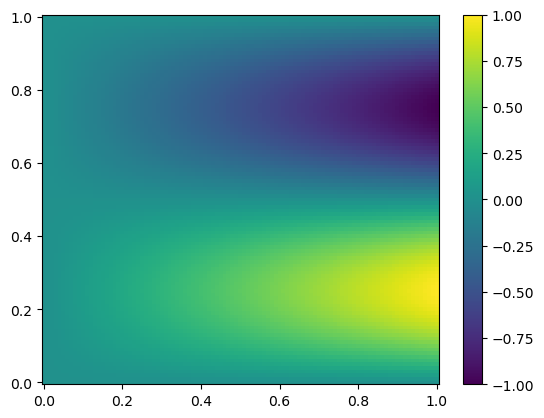

In [ ]:
x_min = 0
x_max = 1
x_res = 101
x_step = (x_max - x_min) / (x_res - 1)

y_min = 0
y_max = 1
y_res = 101
y_step = (y_max - y_min) / (y_res - 1)

def x(i):
    return x_min + i*x_step

def y(j):
    return y_min + j*y_step

X = x(np.arange(x_res))
Y = y(np.arange(y_res))
Z_ = np.zeros((x_res, y_res), dtype=float)
for i in range(x_res):
    for j in range(y_res):
        Z_[i, j] = f(x(i), y(j))
Z_ = Z_.T

plt.pcolormesh(Y, X, Z_)
plt.colorbar()
plt.show()

In [15]:
plt.pcolormesh(Y, X, Z - Z_)
plt.colorbar()
plt.show()

NameError: name 'Z_' is not defined

# 2

In [3]:
def f(x, y):
    return (x-0.5)**2 + (y-0.5)**2
    # return np.sin(3*x)**2/2 + np.sin(3*y)**2/2
    # return np.sin(10*x)**2 * np.sin(10*y)**2

def gradf(x, y):
    return np.array([2*(x-0.5), 2*(y-0.5)]).T
    # return np.array([3*np.cos(3*x)*np.sin(3*x), 3*np.cos(3*y)*np.sin(3*y)]).T
    # return np.array([20*np.cos(10*x)*np.sin(10*x)*np.sin(10*y)**2, 20*np.sin(10*x)**2*np.cos(10*y)*np.sin(10*y)]).T

(0.0, 1.0)

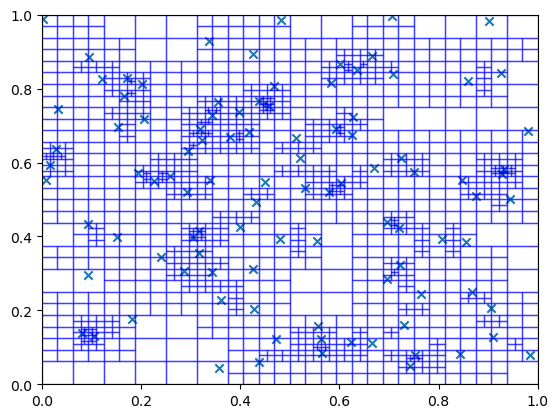

In [4]:
np.random.seed(123)
count = 100
coordinates = sample_points(count, "random")

root = wit.Hypercube([0, 0], 1, coordinates)
root.whitney_decompose()

jets = np.zeros([count, 3])
jets[:,0] = f(coordinates[:,0], coordinates[:,1])
jets[:,1:] = gradf(coordinates[:,0], coordinates[:, 1])
wit.assign_jets(root, jets)

fig, ax = plt.subplots(1)
root.plot(ax, edgecolor = 'b', facecolor = "None")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

In [7]:
x_min = 0
x_max = 1
x_res = 80
x_step = (x_max - x_min) / (x_res - 1)

y_min = 0
y_max = 1
y_res = 80
y_step = (y_max - y_min) / (y_res - 1)

def x(i):
    return x_min + i*x_step

def y(j):
    return y_min + j*y_step

X = x(np.arange(x_res))
Y = y(np.arange(y_res))
Z = np.zeros((x_res, y_res), dtype=float)
for i in range(x_res):
    for j in range(y_res):
        point = np.array([x(i), y(j)])
        Z[i, j] = fun(point)
Z = Z.T

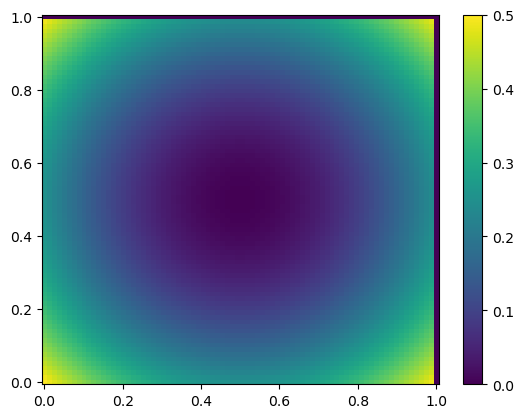

In [8]:
# fig, ax = plt.subplots(1)
plt.pcolormesh(Y, X, Z)
plt.colorbar()
# root.plot(ax, edgecolor = 'b', facecolor = "None")
plt.show()

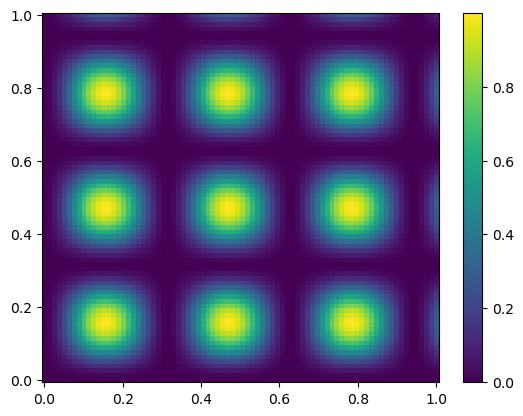

In [37]:
x_min = 0
x_max = 1
x_res = 80
x_step = (x_max - x_min) / (x_res - 1)

y_min = 0
y_max = 1
y_res = 80
y_step = (y_max - y_min) / (y_res - 1)

def x(i):
    return x_min + i*x_step

def y(j):
    return y_min + j*y_step

X = x(np.arange(x_res))
Y = y(np.arange(y_res))
Z_ = np.zeros((x_res, y_res), dtype=float)
for i in range(x_res):
    for j in range(y_res):
        # point = np.array([x(i), y(j)])
        Z_[i, j] = f(x(i), y(j))
Z_ = Z_.T

plt.pcolormesh(Y, X, Z_)
plt.colorbar()
plt.show()

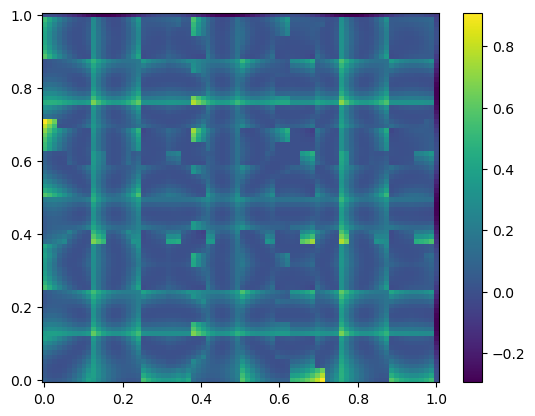

In [38]:
plt.pcolormesh(Y, X, Z - Z_)
plt.colorbar()
plt.show()

# 3

In [31]:
def f(x):
    # return np.sin(5*x)**2
    return x

def gradf(x):
    return 1

(0.0, 1.0)

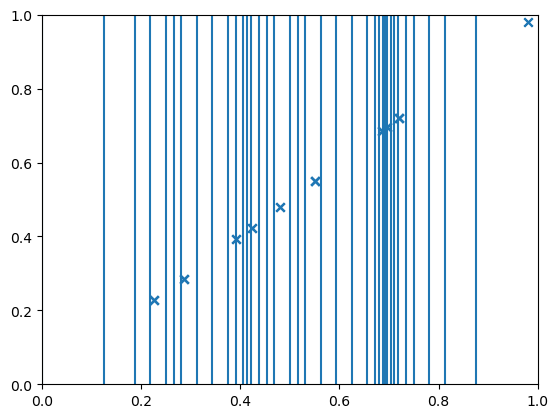

In [35]:
np.random.seed(123)
count = 10

coordinates = np.array([[p] for p in np.random.rand(count)])

root = wit.Hypercube([0], 1, coordinates)
root.whitney_decompose()

jets = np.zeros([count, 2])
jets[:,0] = f(coordinates[:,0])
jets[:,1] = gradf(coordinates[:,0])
wit.assign_jets(root, jets)

fig, ax = plt.subplots(1)
root.plot(ax, edgecolor = 'b', facecolor = "None")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

In [36]:
x_min = 0
x_max = 0.999
x_res = 80
x_step = (x_max - x_min) / (x_res - 1)

def x(i):
    return x_min + i*x_step

X = x(np.arange(x_res))
Z = np.zeros((x_res), dtype=float)
for i in range(x_res):
    point = np.array([x(i)])
    Z[i] = fun(point)

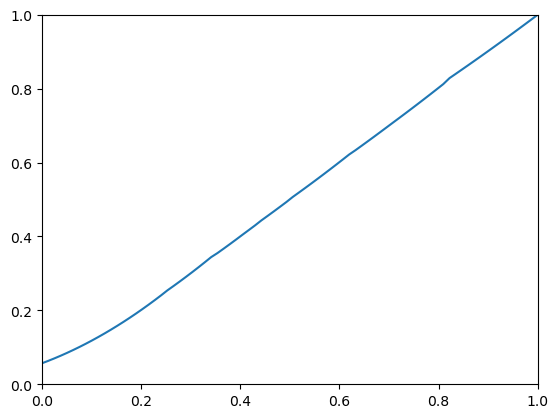

In [37]:
plt.plot(X, Z)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [38]:
x_min = 0
x_max = 1
x_res = 80
x_step = (x_max - x_min) / (x_res - 1)

def x(i):
    return x_min + i*x_step

X = x(np.arange(x_res))
Z_ = np.zeros((x_res), dtype=float)
for i in range(x_res):
    point = np.array([x(i)])
    Z_[i] = f(point)

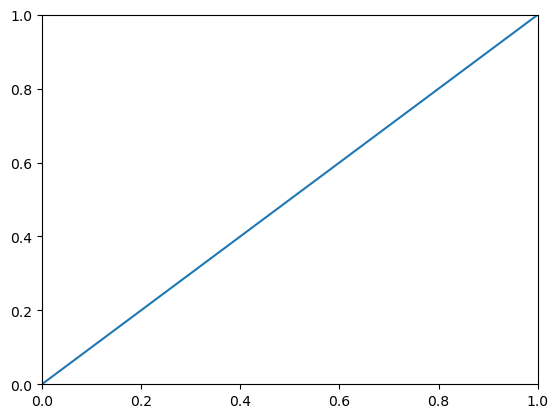

In [39]:
plt.plot(X, Z_)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()